In [2]:
%load_ext autoreload
%autoreload 2

In [125]:
import tensorflow as tf
import numpy as np
import pandas as pd
import utils

In [60]:
from collections import defaultdict
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
# Overall - both left and right annotation

In [4]:
df_calom_ele = utils.load_dataset("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/recordio_allinfo_v2/training/calo_matched/*.proto",{'read_hits':False})
df_calom_gamma = utils.load_dataset("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/recordio_allinfo_v2/training/calo_matched/*.proto",{'read_hits':False})
df_nocalom_ele = utils.load_dataset("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/electrons/recordio_allinfo_v2/training/no_calo_matched/*.proto",{'read_hits':False})
df_nocalom_gamma = utils.load_dataset("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/windows_data/gammas/recordio_allinfo_v2/training/no_calo_matched/*.proto",{'read_hits':False})

### Saving means and std for seeding features

In [109]:
features = [ ]
for dataset in [df_calom_ele, df_calom_gamma, df_nocalom_ele, df_nocalom_gamma]:
    i = 0
    for el in dataset.take(10000):
        i+=1
        if i% 100 == 0: print('.',end='')
        features.append(el[0]['s_f'].numpy())
    
feat = np.stack(features, axis=0)
means = np.mean(feat, axis=0)
stds = np.std(feat, axis=0)
np.save("seed_features_means.np", means)
np.save("seed_features_stds.np", stds)

................................................................................................................................................................................................................................................................................................................................................................................................................

# Metadata seed analysis

Caloseed position in the window

In [113]:
data = [ ]
for fl, dataset in zip( ['ele','gamma'],[df_calom_ele, df_calom_gamma]):
    i = 0
    for el in dataset.take(100000):
        i+=1
        if i% 100 == 0: print('.',end='')
        d = {'n_cl': el[0]['n_cl'].numpy(), 'fl':fl}
        d['seed_calomatch'] = el[0]['s_l'][0].numpy()
        d['seed_caloseed'] = el[0]['s_l'][1].numpy()
        d['seed_et'] = el[0]['s_f'][6].numpy()
        d['seed_pos'] = tf.where(el[1]['cl_l'][:,0]==1)[0,0].numpy()
        if not d['seed_caloseed']:
            cl_caloseed = ((el[1]['cl_l'][:,2]==1) & (el[1]['cl_l'][:,0]==0))
            if tf.reduce_any(cl_caloseed):
                cl_caloseed_et = el[1]['cl_f'][cl_caloseed][0,6].numpy()
                
                d['cl_seed_pos'] =tf.where(cl_caloseed)[0,0].numpy()
                d['cl_seed_et'] = cl_caloseed_et
                d['no_caloseed'] = False
            else:
                d['no_caloseed'] = True
                d['cl_seed_et'] = 0
                d['cl_seed_pos'] = -1
        else:
            d['no_caloseed'] = False
            d['cl_seed_et'] = 0
            d['cl_seed_pos'] = -1
        data.append(d)
    
df = pd.DataFrame(data)  

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [114]:
df.head()

,cl_seed_et,cl_seed_pos,fl,n_cl,no_caloseed,seed_calomatch,seed_caloseed,seed_et,seed_pos
0,0.000000,-1,ele,6,False,1,1,49.874691,0
1,0.000000,-1,ele,5,False,1,1,24.210817,0
2,0.000000,-1,ele,4,False,1,1,21.773088,0
3,0.000000,-1,ele,6,False,1,1,10.459217,0
4,49.874691,0,ele,7,False,1,0,1.329614,1


In [115]:
df.to_csv("metadata_seeding_analysis.csv",index=False)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

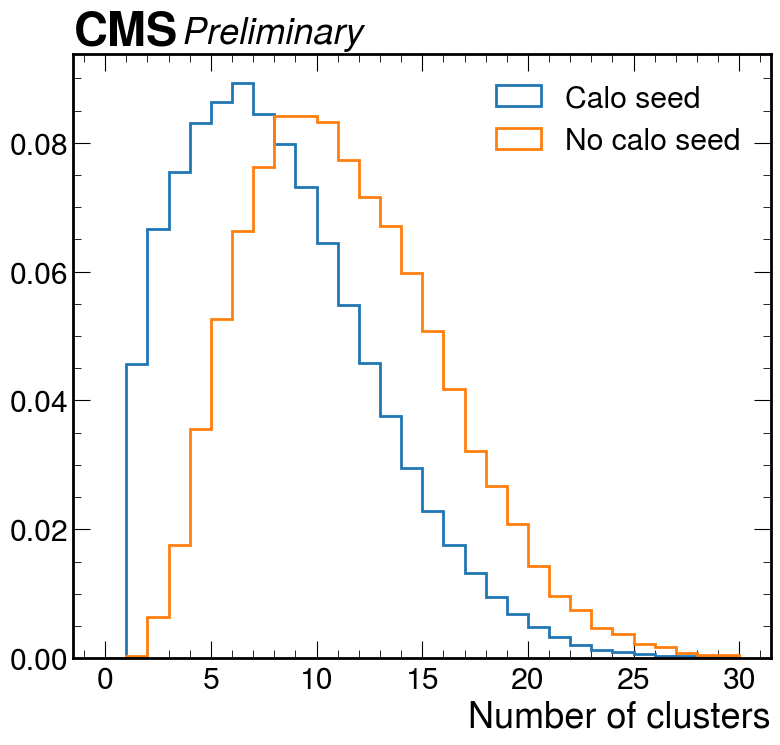

In [116]:
bins = 30
xrange = [0,30]
var = 'n_cl'
title = 'Number of clusters'
log = False
ylim = None
dens = True

fig,  ax1 = plt.subplots(1,1, figsize=(9,8), dpi=100)
plt.hist(df[df.seed_caloseed==1][var], bins=bins, range=xrange,  histtype='step',density=dens, label="Calo seed", linewidth=2)
plt.hist(df[(df.seed_caloseed==0)][var], bins=bins, range=xrange,  histtype='step',density=dens, label="No calo seed", linewidth=2)
plt.xlabel(title)
if log: plt.yscale("log")
if ylim: plt.ylim(ylim)
plt.legend(loc="upper right")
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary '))

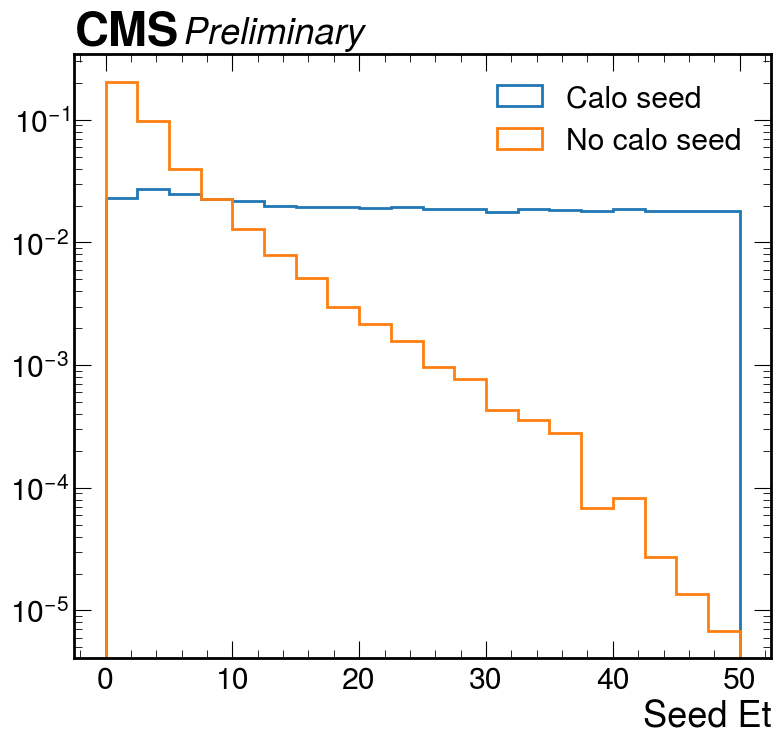

In [117]:
bins = 20
xrange = [0,50]
var = 'seed_et'
title = 'Seed Et'
log = True
ylim = None
dens = True

fig,  ax1 = plt.subplots(1,1, figsize=(9,8), dpi=100)
plt.hist(df[df.seed_caloseed==1][var], bins=bins, range=xrange,  histtype='step',density=dens, label="Calo seed", linewidth=2)
plt.hist(df[(df.seed_caloseed==0)][var], bins=bins, range=xrange,  histtype='step',density=dens, label="No calo seed", linewidth=2)
plt.xlabel(title)
if log: plt.yscale("log")
if ylim: plt.ylim(ylim)
plt.legend(loc="upper right")
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

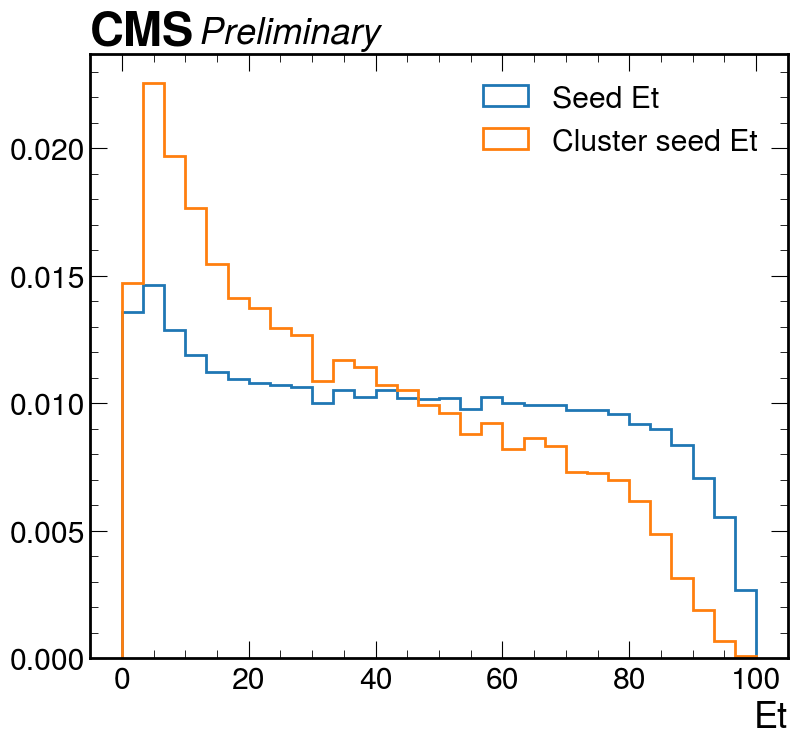

In [118]:
bins = 30
xrange = [0,100]
var = 'seed_et'
title = 'Et'
log = False
ylim = None
dens = True

fig,  ax1 = plt.subplots(1,1, figsize=(9,8), dpi=100)
plt.hist(df[df.seed_caloseed==1]['seed_et'], bins=bins, range=xrange,  histtype='step',density=dens, label="Seed Et ", linewidth=2)
plt.hist(df[(df.seed_caloseed==0)]['cl_seed_et'], bins=bins, range=xrange,  histtype='step',density=dens, label="Cluster seed Et", linewidth=2)
plt.xlabel(title)
if log: plt.yscale("log")
if ylim: plt.ylim(ylim)
plt.legend(loc="upper right")
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

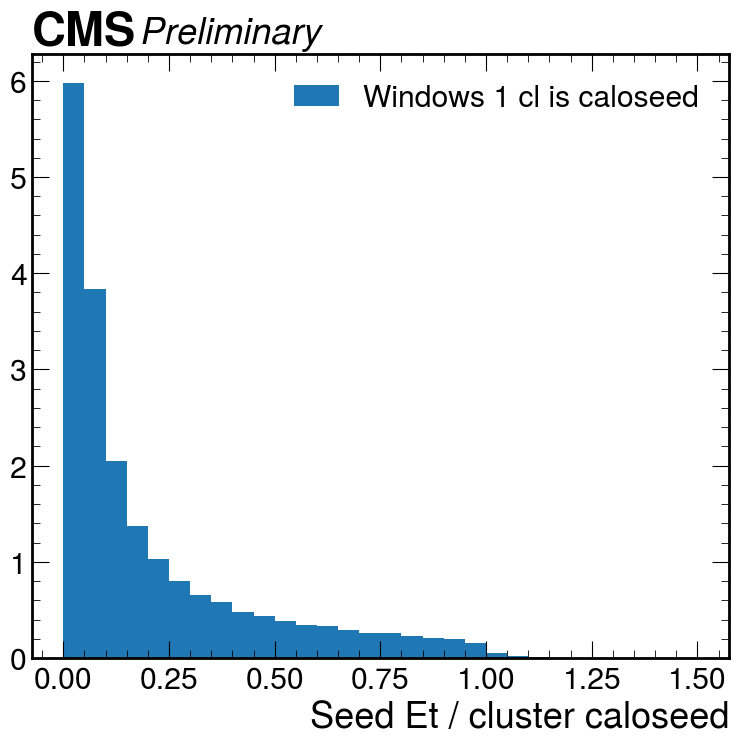

In [119]:
bins = 30
xrange = [0,1.5]
title = 'Seed Et / cluster caloseed'
log = False
ylim = None
dens = True

fig,  ax1 = plt.subplots(1,1, figsize=(9,8), dpi=100)
plt.hist( df[(df.seed_caloseed==0)&(df.no_caloseed==0)]['seed_et']/df[(df.seed_caloseed==0)&(df.no_caloseed==0)]['cl_seed_et'] , bins=bins, range=xrange, 
                density=dens, label="Windows 1 cl is caloseed", linewidth=2)
plt.xlabel(title)
if log: plt.yscale("log")
if ylim: plt.ylim(ylim)
plt.legend(loc="upper right")
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

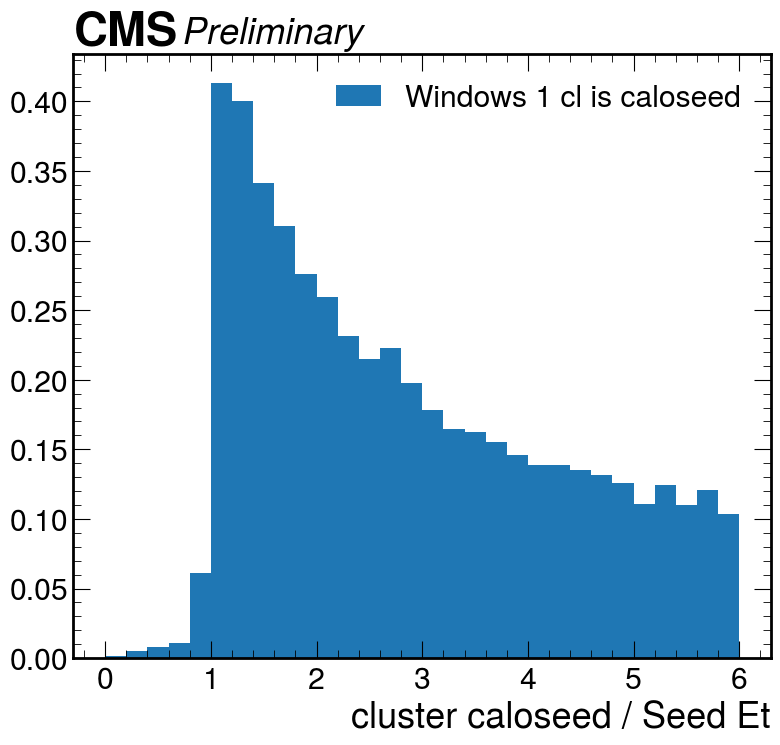

In [120]:
bins = 30
xrange = [0,6]
title = 'cluster caloseed / Seed Et'
log = False
ylim = None
dens = True

fig,  ax1 = plt.subplots(1,1, figsize=(9,8), dpi=100)
plt.hist( df[(df.seed_caloseed==0)&(df.no_caloseed==0)]['cl_seed_et'] / df[(df.seed_caloseed==0)&(df.no_caloseed==0)]['seed_et'], bins=bins, range=xrange, 
                density=dens, label="Windows 1 cl is caloseed", linewidth=2)
plt.xlabel(title)
if log: plt.yscale("log")
if ylim: plt.ylim(ylim)
plt.legend(loc="upper right")
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary '))

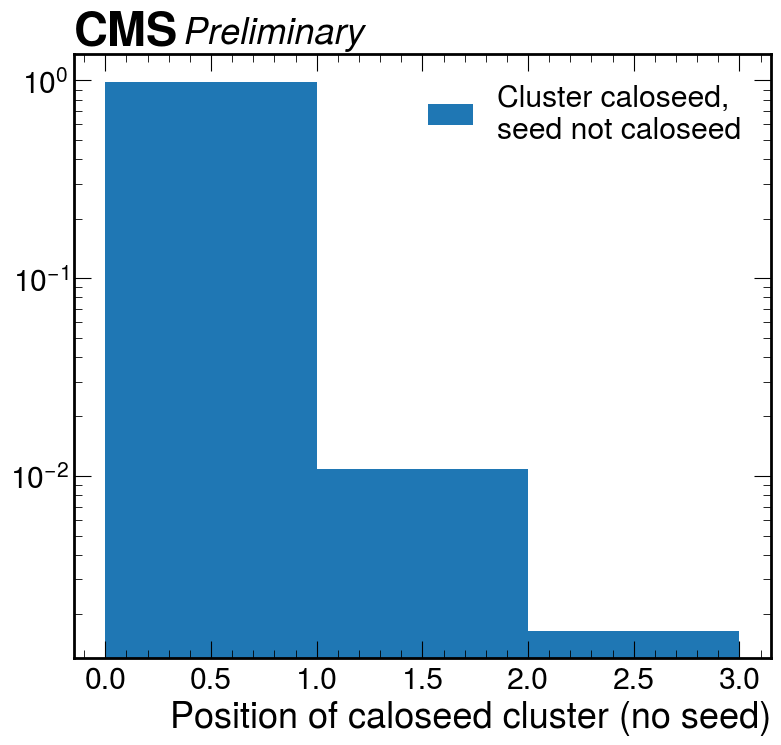

In [121]:
bins = 3
xrange = [0,3]
title = 'Position of caloseed cluster (no seed)'
log = True
ylim = None
dens = True

fig,  ax1 = plt.subplots(1,1, figsize=(9,8), dpi=100)
plt.hist( df[(df.seed_caloseed==0)&(df.no_caloseed==False)]['cl_seed_pos'], bins=bins, range=xrange, 
                density=dens, label="Cluster caloseed, \nseed not caloseed", linewidth=2)
plt.xlabel(title)
if log: plt.yscale("log")
if ylim: plt.ylim(ylim)
plt.legend(loc="upper right")
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Preliminary '))

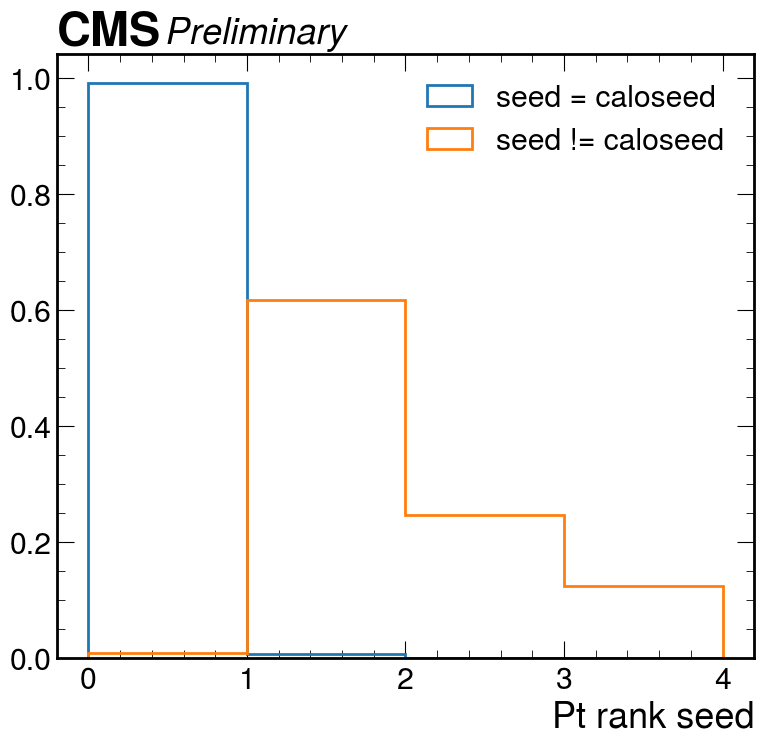

In [141]:
bins = 4
xrange = [0,4]
title = 'Pt rank seed'
log = False
ylim = None
dens = True

fig,  ax1 = plt.subplots(1,1, figsize=(9,8), dpi=100)
plt.hist( df[(df.seed_caloseed==1)]['seed_pos'], bins=bins, range=xrange, histtype='step', density=dens, label="seed = caloseed", linewidth=2)
plt.hist( df[(df.seed_caloseed==0)]['seed_pos'], bins=bins, range=xrange, histtype='step', density=dens, label="seed != caloseed", linewidth=2)
plt.xlabel(title)
if log: plt.yscale("log")
if ylim: plt.ylim(ylim)
plt.legend(loc="upper right")
hep.cms.text("Preliminary ",loc=0)

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Preliminary '))

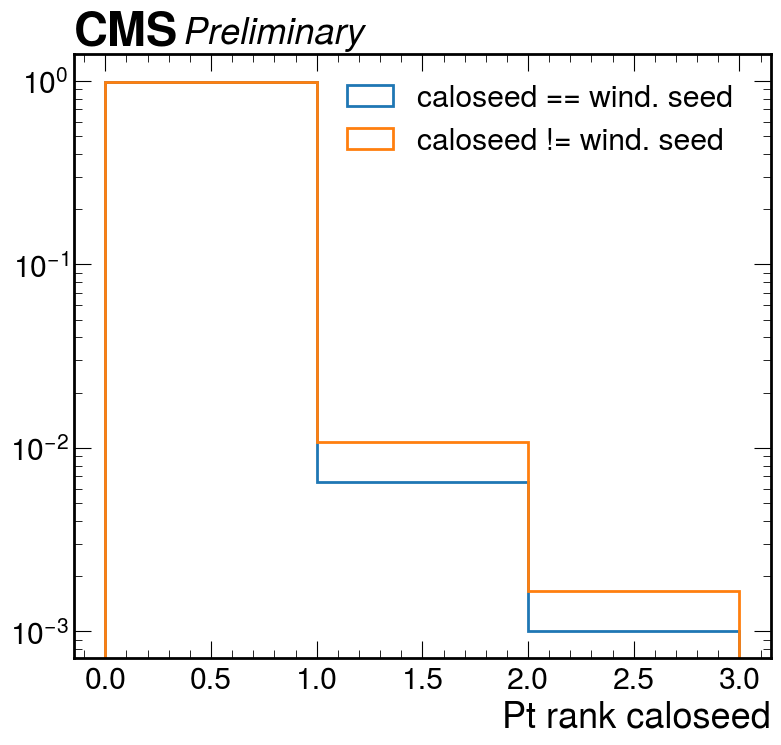

In [129]:
bins = 3
xrange = [0,3]
title = 'Pt rank caloseed'
log = True
ylim = None
dens = True

fig,  ax1 = plt.subplots(1,1, figsize=(9,8), dpi=100)
plt.hist( df[(df.seed_caloseed==1)]['seed_pos'], bins=bins, range=xrange, histtype='step', density=dens, label="caloseed == wind. seed ", linewidth=2)
plt.hist( df[(df.seed_caloseed==0)]['cl_seed_pos'], bins=bins, range=xrange, histtype='step', density=dens, label="caloseed != wind. seed", linewidth=2)
plt.xlabel(title)
if log: plt.yscale("log")
if ylim: plt.ylim(ylim)
plt.legend(loc="upper right")
hep.cms.text("Preliminary ",loc=0)

In [134]:
a1, b1 = np.histogram(df[(df.seed_caloseed==1)]['seed_pos'], bins=bins, range=xrange)

In [135]:
a2, b2 = np.histogram(df[(df.seed_caloseed==0)]['cl_seed_pos'], bins=bins, range=xrange)

In [136]:
a = a1+ a2

In [138]:
a = a/ np.sum(a)

In [140]:
a

array([0.99102573, 0.00777737, 0.0011969 ])